In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [11]:
df = pd.read_csv("Algerian_forest_fires_dataset_Cleaned.csv")

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [17]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [18]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [19]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [20]:
# Independant and dependant features

x=df.drop('FWI',axis=1)
y=df['FWI']

In [21]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [22]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [23]:
# Train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [26]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


 Why We Remove Highly Correlated Features in Feature Selection:
📌 1. Redundancy

When two features are highly correlated, they carry similar information. Including both doesn't add value but introduces redundancy.
📌 2. Multicollinearity

In models like Linear Regression, Logistic Regression, and other parametric models, highly correlated features cause:

    Multicollinearity, which inflates the variance of coefficients.

    This makes model predictions unstable and less interpretable.

    It becomes hard to determine which feature is actually influencing the target.

📌 3. Overfitting Risk

More redundant features increase the complexity of the model without improving performance. This raises the risk of:

    Overfitting on training data.

    Poor generalization to unseen data.

📌 4. Improves Training Efficiency

Removing highly correlated features:

    Reduces the dimensionality of the dataset.

    Speeds up training time and improves convergence.

📐 Example:

If you have:

    Feature_A = age in years

    Feature_B = age in months

These will be nearly perfectly correlated (correlation ≈ 1). Keeping both will:

    Confuse the model

    Not improve performance

✅ When Should You Remove Correlated Features?

    Typically, when correlation > 0.85 or 0.90, one of them is dropped.

    Use a correlation matrix (heatmap) to identify such pairs.

Multicollinearity (in Regression)

    Definition: When two or more independent variables are highly correlated.

    Problem:

        Makes coefficients unstable and hard to interpret.

        Inflates variance → unreliable p-values and wide confidence intervals.

        Increases risk of overfitting.


Detection Methods:

    Correlation Matrix: Check for correlation > 0.85.

    VIF (Variance Inflation Factor): VIF > 5 or 10 indicates multicollinearity.


Solutions:

    Drop one of the correlated features.

    Use PCA to reduce dimensions.

    Apply Ridge or Lasso regression to regularize.

In [27]:
# now we are removing highly correlated features

def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [29]:
correlation(x_train,0.85)

{'BUI', 'DC'}

In [30]:
corr_features=correlation(x_train,0.85)

In [35]:
# drop this features when corr is grater than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape


((182, 9), (61, 9))

In [36]:
# Feature scaling and standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

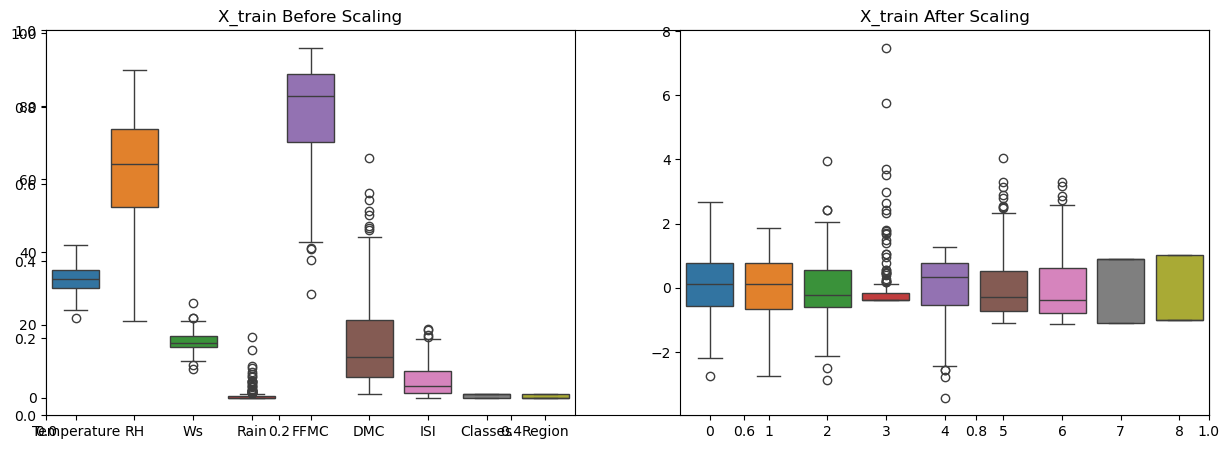

In [37]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

# Linear Reagression

Mean absolute error 0.546823646524997
R2 Score 0.9847657384266951


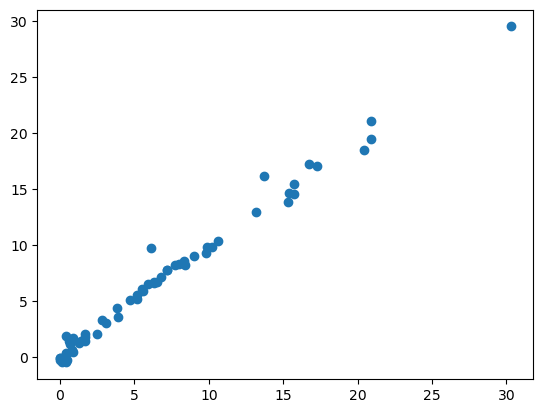

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)